<a href="https://colab.research.google.com/github/jeangarcia77/sales-predictions/blob/main/Food_Sales_Predictions_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction: Mount and Import**

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')


filename ="/content/drive/MyDrive/01 Week 1: Python/sales_predictions.csv"
df = pd.read_csv(filename)
corr = df.corr()
df.head()




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### **Duplicate and Missing Values**


In [42]:
# Check for duplicated data

df.duplicated()
df.duplicated().sum()

0

In [43]:
#Check for missing values

# Sum of missing values in item weight and outlet size columns
num_missing_item_weight = df['Item_Weight'].isna().sum()
num_missing_outlet_size = df['Outlet_Size'].isna().sum()

total_rows = df.shape[0]

percent_missing_item_weight = (num_missing_item_weight/total_rows)*100
percent_missing_outlet_size = (num_missing_outlet_size/total_rows)*100

print(f'{percent_missing_item_weight:.2f}% of the data in the Item Weight column is missing\n')
print(f'{percent_missing_outlet_size:.2f}% of the data in the Outlet Size column is missing')

17.17% of the data in the Item Weight column is missing

28.28% of the data in the Outlet Size column is missing


In [44]:
# Handling Missing Values

# dropped columns Item Weight and Outlet Size - details in Notes below
df.drop(columns='Item_Weight', inplace=True)
df.drop(columns='Outlet_Size', inplace=True)


#df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)


# Confirm columns were dropped - no more missing data
df.isna().sum()


Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [45]:
# Confirm columns were dropped
df.head(5)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


## **Corrected incorrect categories **

In [46]:
#Corrected incorrect categories - Item_Fat_Content

# All changes for Low Fat as new column value standard
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')


# All changes for Regular as new column value standard
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [47]:
#Corrected incorrect categories - Item_Type

# All changes for Fruits & Vegetables as new column value standard
df['Item_Type'] = df['Item_Type'].replace('Fruits and Vegetables', 'Fruits & Vegetables')
# All changes for Health & Hygiene as new column value standard
df['Item_Type'] = df['Item_Type'].replace('Health and Hygiene', 'Health & Hygiene')


df['Item_Type'].value_counts()

Fruits & Vegetables    1232
Snack Foods            1200
Household               910
Frozen Foods            856
Dairy                   682
Canned                  649
Baking Goods            648
Health & Hygiene        520
Soft Drinks             445
Meat                    425
Breads                  251
Hard Drinks             214
Others                  169
Starchy Foods           148
Breakfast               110
Seafood                  64
Name: Item_Type, dtype: int64

# Statistical Analyses - Models

In [48]:
# seperate the data into numeric and categorical
df_num = df[['Item_Visibility','Item_MRP','Item_Outlet_Sales']]
df_cat = df[['Item_Fat_Content','Outlet_Location_Type','Outlet_Type']]

#'Item_Type',,'Outlet_Identifier' - dropped columns

### Numerical models

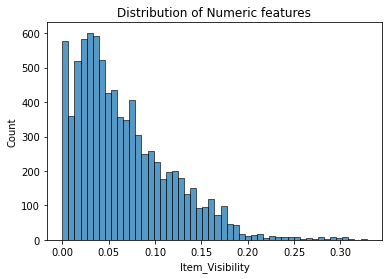

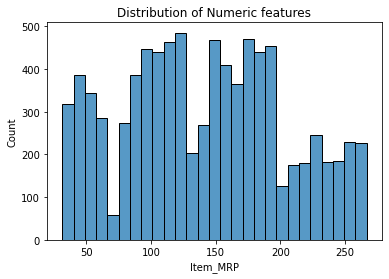

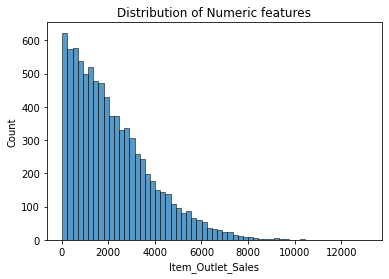

In [49]:
for i in df_num.columns:
    sns.histplot(df_num[i]).set_title('Distribution of Numeric features')
    plt.show()

Histograms to display distribution of numerical columns within our dataset. The graphs allow us to see the distribution of relevant values and how often the value occurs. For example, you can see there is a trend with most visibility of items within the Item_Visibility column below 0.30.

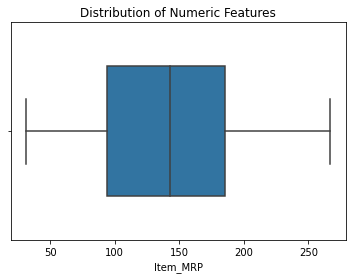

In [50]:
sns.boxplot(data=df, x='Item_MRP', width=.6).set(title='Distribution of Numeric Features');

# reference - how to set title - https://www.statology.org/seaborn-title/

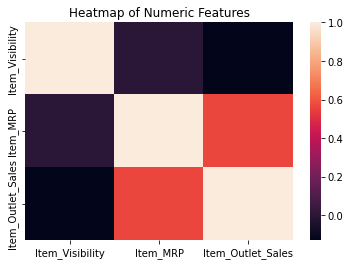

In [51]:
sns.heatmap(df_num.corr()).set(title='Heatmap of Numeric Features');


Correlation heatmap between the numeric columns


> Item_MRP and Item_Outlet_Sales have a higher correlation



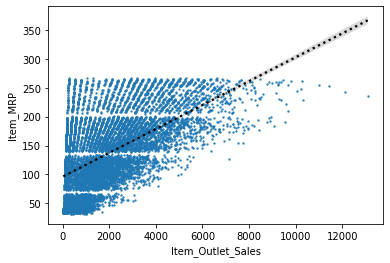

In [52]:
sns.regplot(data=df, x='Item_Outlet_Sales', y='Item_MRP',
            scatter_kws={'s':2},
            line_kws = dict(color='black', ls=':'));



> Although Item MRP and Item Outlet Sales have the strongest correlation according to our heatmap. A trend between increasing Item Outlet Sales isn't as prevalent with the increase of Item MRP.



### Change over Outlet Establishment Year and Item MRP/Outlet Sales ?

In [53]:
line_df = df.groupby('Outlet_Establishment_Year').mean()
line_df

,Item_Visibility,Item_MRP,Item_Outlet_Sales
Outlet_Establishment_Year,,,
1985,0.076597,139.796485,2483.677474
1987,0.059957,141.425982,2298.995256
1997,0.060464,142.057387,2277.844267
1998,0.101457,140.777594,339.351662
1999,0.060806,140.297699,2348.354635
2002,0.060474,140.950246,2192.384798
2004,0.061263,143.122481,2438.841866
2007,0.061377,139.421119,2340.675263
2009,0.061014,141.678634,1995.498739


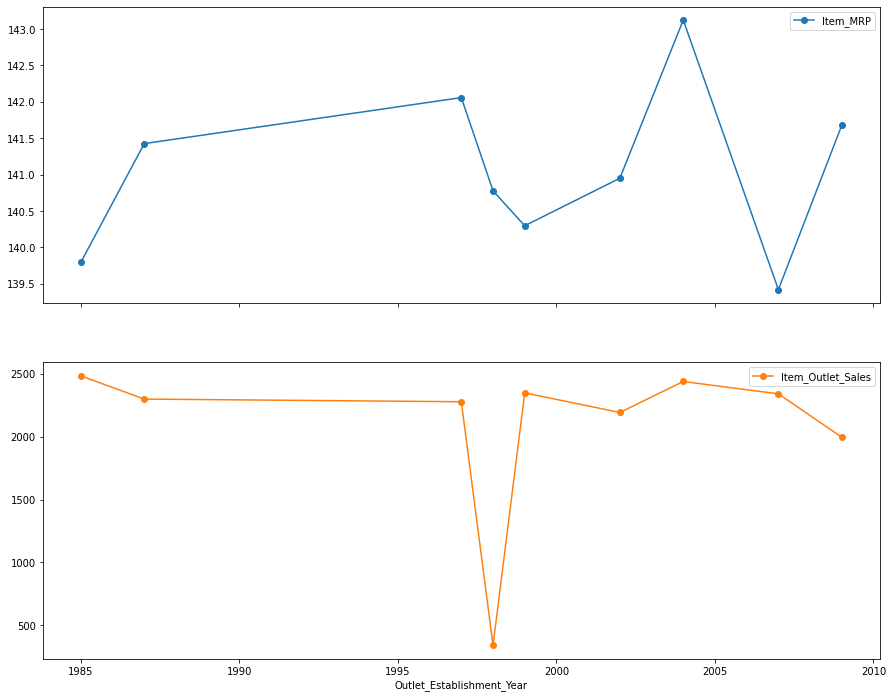

In [54]:
line_df.plot(y=['Item_MRP', 'Item_Outlet_Sales'], subplots=True, marker='o',figsize=(15,12));

### Categorical models

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


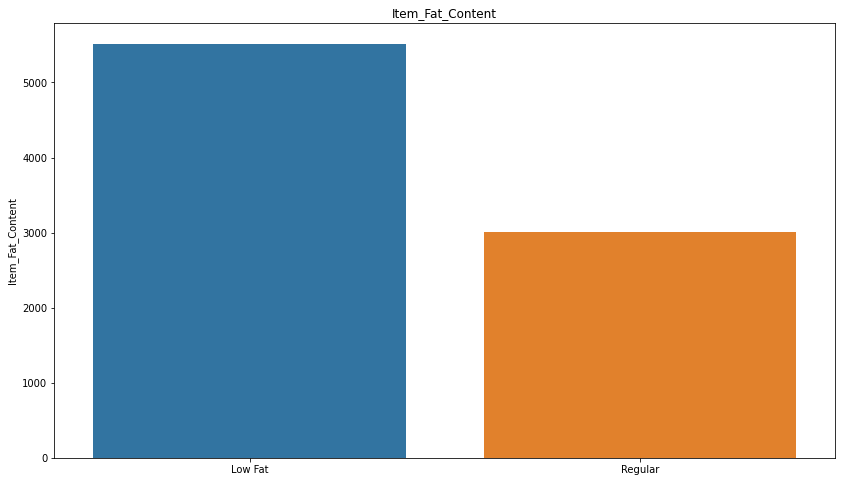

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


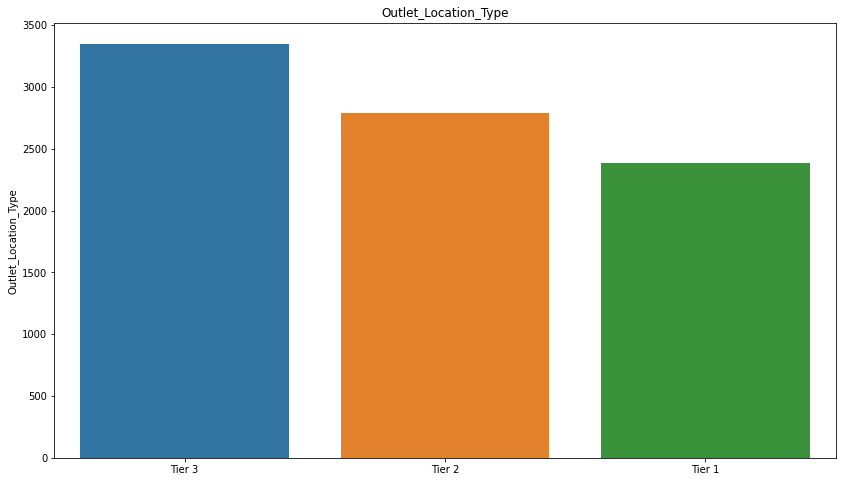

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


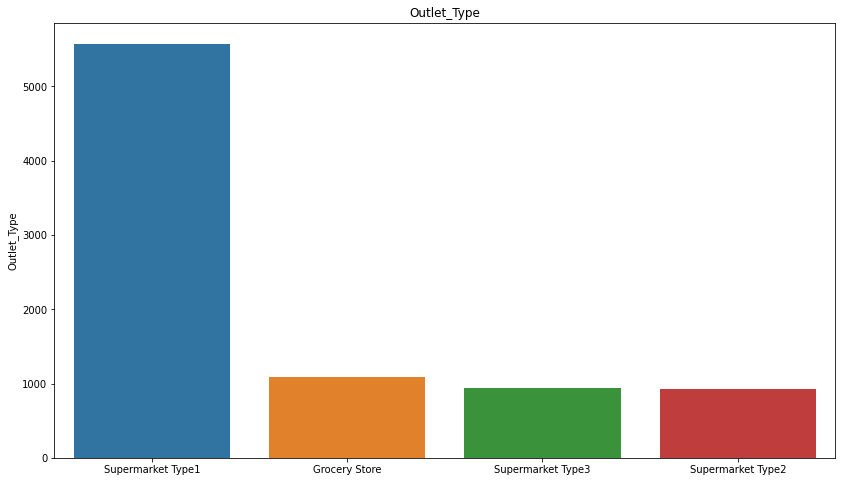

In [55]:
for i in df_cat.columns:
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show();

# Reference - https://www.analyticsvidhya.com/blog/2021/05/titanic-survivors-a-guide-for-your-first-data-science-project/

The graphs presents most common values within the categorical columns:

1.   Item_Fat_Content: **Low Fat** seems to be representive of column
2.   Outlet_Location_Type: **Tier 3** seems to be representive of column
3.   Outlet_Type: **Supermarket Type 1** seems to be representive of column



In [56]:
print("Below values represent the mode within their columns: ", "\n\n")

print("Column Item_Fat_Content:", df['Item_Fat_Content'].mode().sum(), '\n')

print("Column Outlet_Location_Type:", df['Outlet_Location_Type'].mode().sum(), '\n')

print("Column Outlet_Type:", df['Outlet_Type'].mode().sum())

Below values represent the mode within their columns:  


Column Item_Fat_Content: Low Fat 

Column Outlet_Location_Type: Tier 3 

Column Outlet_Type: Supermarket Type1


### Numerical & Categorical models

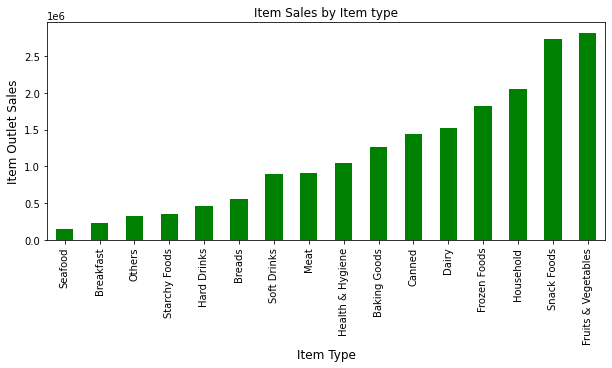

In [57]:
# Item types and item Outlet sales
plt.figure(figsize=(10,4))
df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending=True).plot(kind='bar', color='green')

#labels
plt.title("Item Sales by Item type")
plt.ylabel('Item Outlet Sales', fontsize=12)
plt.xlabel('Item Type', fontsize=12)


plt.show()

Distribution of Item outlet sales by item type in our dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


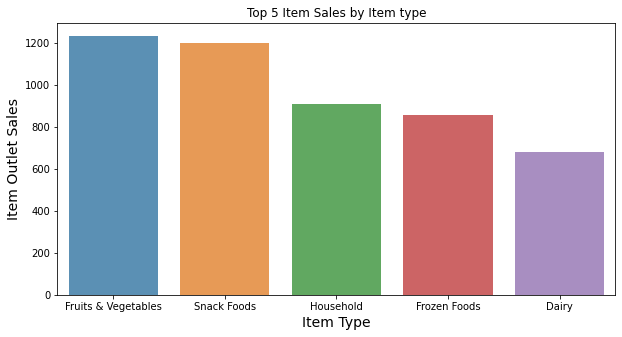

In [58]:
top5_Items  = df['Item_Type'].value_counts()
top5_Items = top5_Items[:5,]
plt.figure(figsize=(10,5))
sns.barplot(top5_Items.index, top5_Items.values, alpha=0.8)
plt.title('Top 5 Item Sales by Item type')
plt.ylabel('Item Outlet Sales', fontsize=14)
plt.xlabel('Item Type', fontsize=14)
plt.show()

Comparing the item outlet sales by item type we can see what item types drive food sales in the stores. Doubling down on these items may further increase sales.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


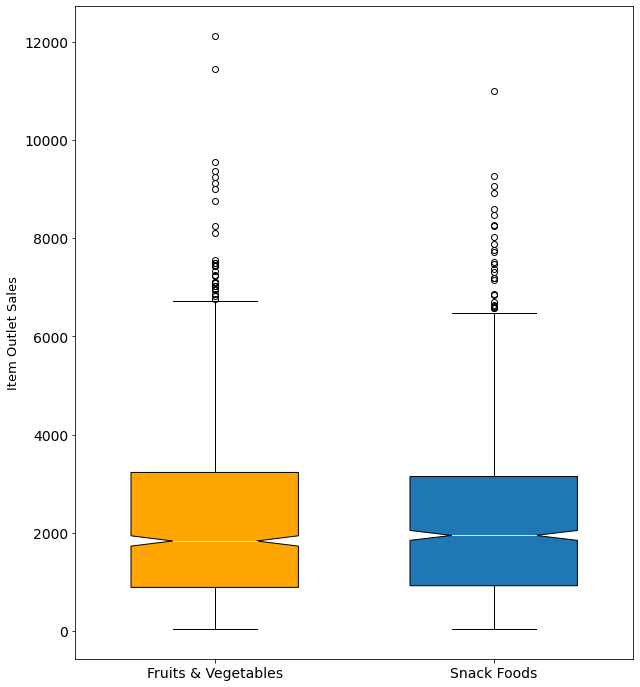

In [59]:

# Creating boxplots
FruitsVeg = df.loc[df['Item_Type']=='Fruits & Vegetables','Item_Outlet_Sales']
SnackFoods = df.loc[df['Item_Type']=='Snack Foods','Item_Outlet_Sales']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,12))
boxplots = axes.boxplot([FruitsVeg, SnackFoods], 
                        
            notch = True, 
            labels = ['Fruits & Vegetables', 'Snack Foods'], 
            widths = .6, 
            patch_artist = True, 
            medianprops = dict(linestyle = '-', color = 'yellow'));
 
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('orange');

plt.ylabel('Item Outlet Sales', fontsize = 13);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);

Fruits & Vegetables and Snack Foods both drive the most in sales as far as Item Types go in our dataset. The notches are very close in median and may be close to symmetrical. Fruits & Vegetables also has larger outliers.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


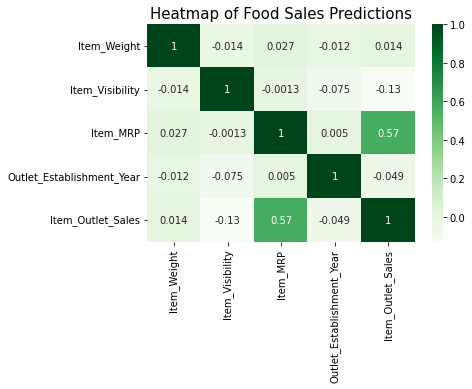

In [60]:
import seaborn as sns
sns.heatmap(corr, cmap = 'Greens', annot= True)
ax = plt.axes()
ax.set_title('Heatmap of Food Sales Predictions', fontsize=15);

There seems to be a moderate correlation between Item MRP and Item Outlet Sales. Than with any other values in the dataset.

### **Summary Statistics**

In [61]:

df.agg(
    {
        "Item_Visibility": ["min", "max", "mean"],
        "Item_MRP": ["min", "max", "mean"],
        "Outlet_Establishment_Year": ["min", "max", "mean"],
        "Item_Outlet_Sales": ["min", "max", "mean"]
        
    }
)

# or df.describe().round(2) -  find summary stats for each numerical column and round to two decimal places


,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,0.000000,31.290000,1985.000000,33.290000
max,0.328391,266.888400,2009.000000,13086.964800
mean,0.066132,140.992782,1997.831867,2181.288914


## **Machine learning to make predictions**

In [62]:
# Specify target variable (y)
y= df['Item_Outlet_Sales']

# Exclude column from features (X)
X = df.drop(columns = 'Item_Outlet_Sales')

In [63]:
#Perform a train test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [64]:
##instantiate the selectors for numeric and categorical data types
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')


# Numerical data - Mean Strategy
mean_imputer = SimpleImputer(strategy='mean', fill_value=None)
freq_imputer = SimpleImputer(strategy='most_frequent')

# numeric pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)
cat_pipeline = make_pipeline(freq_imputer, ohe)

num_tuple = (num_pipeline, num_selector)
cat_tuple = (cat_pipeline, cat_selector)

In [65]:



preprocessing_pipeline = make_pipeline(mean_imputer, freq_imputer, scaler)
preprocessing_pipeline


preprocessing_pipeline = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessing_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce0c115790>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce0c1157d0>)])

In [66]:
preprocessing_pipeline.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce0c115790>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce0c1157d0>)])

In [67]:
X_train_processed = preprocessing_pipeline.transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

In [68]:
# View Transformations

X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587
0,-0.712775,1.828109,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.291052,0.603369,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.813319,0.244541,0.136187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.004931,-0.952591,0.732018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.965484,-0.336460,0.493686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# **Conclusion**

In [69]:
df.head(20).describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,20.000000,20.000000,20.000000,20.000000
mean,0.042390,119.920450,1997.750000,1853.387460
std,0.040278,64.001012,7.959602,1210.728486
min,0.000000,45.540200,1985.000000,343.552800
25%,0.011705,55.861400,1994.500000,929.123900
50%,0.026758,114.316300,1999.000000,1605.576700
75%,0.069116,154.632700,2002.500000,2216.281750
max,0.127470,249.809200,2009.000000,4710.535000


### **Notes**


**Missing Values**
*   Columns Item weight and Outlet Size were both missing significant amounts of data (17% and 28% respectively). Allowing these values in our dataset would introduce much room for error. Initially was inclined to replacing Outlet Size missing values with mode. After consideration, I believe that the missing data was too large and would skew the analysis. Dropping both columns should make less room for error.



--------------------------------------------

1. There are 8523 rows and 12 columns
2. Objects, integers and floats among data types

--------------------------------------------

**Notes**

*   No duplicates in data to remove
*   Data types seem to be correct to represent data properly
*   Inconsistent values in ***item fat content*** column - 3 different values for **Low Fat** (Low Fat, LF and low fat). Will keep capitalized first letters for consistency on all columns.
*   .value_counts() - No inconsistent values in any other category value
*   **Item Weight** and **Outlet Size** accounts for ~17% & ~28% (respectively) of missing data






